# Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler

# Loading the Dataset

In [48]:
df = pd.read_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/raw/european_data.csv')

# Getting some insights

Due to privacy issues, we do not know the features.

In [49]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

As we can see, there is no missing value.

In [51]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [52]:
df.duplicated().sum()

np.int64(1081)

In [53]:
df.drop_duplicates()
df.shape

(284807, 31)

In [54]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Let's see how to target variable is distributed.

In [55]:
df['Class'].value_counts()/len(df['Class'])

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

As we can see, the target variable's class distribution is highly imbalanced, so we may need to try some over sampling/under sampling techniques later on.

# Dealing with outliers

<Axes: >

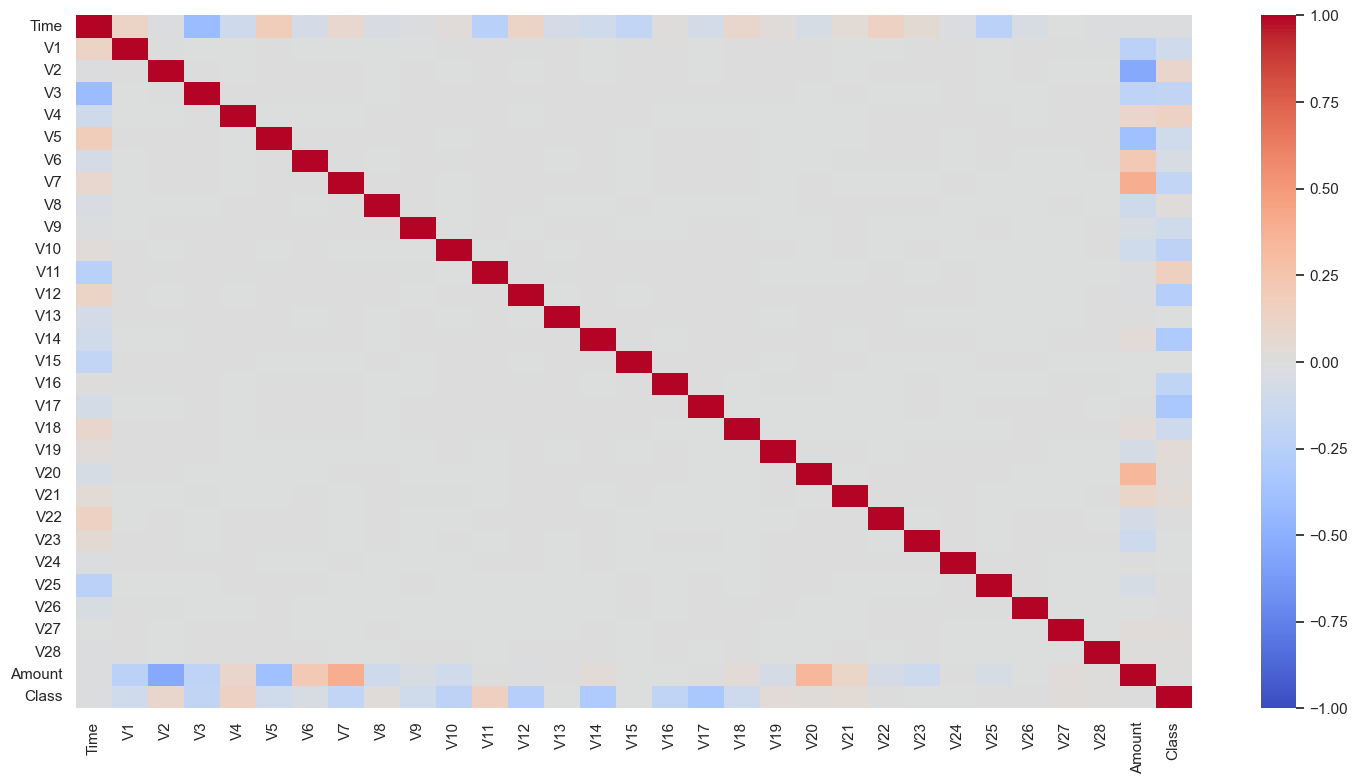

In [56]:
corr_matrix = df.corr()
plt.figure(figsize = (18, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [57]:
corr_matrix.Class.sort_values(ascending = False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [58]:
V14_fraud = df['V14'].loc[df['Class'] == 1]

q25, q75 = np.percentile(V14_fraud, 25), np.percentile(V14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V14_iqr = q75 - q25
print('V14 IQR : {}\n'.format(V14_iqr))

cutoff = V14_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V14_fraud if x < lower or x > upper]
print('V14 Outliers: {}\n'.format(outliers))
print('No of Outliers for V14: {}\n'.format(len(outliers)))

df = df.drop(df[(df['V14'] > upper) | (df['V14'] < lower)].index)

print('-' * 127)
print()

V12_fraud = df['V12'].loc[df['Class'] == 1]

q25, q75 = np.percentile(V12_fraud, 25), np.percentile(V12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V12_iqr = q75 - q25
print('V12 IQR : {}\n'.format(V12_iqr))

cutoff = V12_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V12_fraud if x < lower or x > upper]
print('V12 Outliers: {}\n'.format(outliers))
print('No of Outliers for V12: {}\n'.format(len(outliers)))

df = df.drop(df[(df['V12'] > upper) | (df['V12'] < lower)].index)

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865 

V14 IQR : 5.409902115485521

V14 Outliers: [-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.0499976898594]

No of Outliers for V14: 4

-------------------------------------------------------------------------------------------------------------------------------

Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315 

V12 IQR : 5.780002635714835

V12 Outliers: [-18.0475965708216, -18.6837146333443, -18.5536970096458, -18.4311310279993]

No of Outliers for V12: 4



# Splitting Features and target

In [59]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =.20)

# Normalization/Standardization

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [62]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,...,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05,2.276040e+05
mean,-1.495360e-16,1.766960e-17,-1.230004e-17,-7.492410e-18,-6.243675e-20,-1.123862e-18,9.989880e-19,4.152044e-18,-3.340366e-18,-1.117618e-17,...,-4.214481e-18,4.994940e-19,7.242663e-18,9.865007e-18,-1.270588e-17,-1.245613e-17,2.079144e-17,-6.680733e-18,4.495446e-18,6.159386e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.998255e+00,-2.925529e+01,-4.449829e+01,-2.249433e+01,-4.017559e+00,-3.114579e+01,-1.975397e+01,-3.667898e+01,-3.694046e+01,-1.213930e+01,...,-3.723995e+01,-3.243993e+01,-1.231521e+01,-7.271421e+01,-4.658019e+00,-1.977215e+01,-3.843374e+00,-2.521589e+01,-2.946007e+01,-3.674224e-01
25%,-8.547761e-01,-4.815558e-01,-3.640503e-01,-5.971970e-01,-5.999746e-01,-5.135289e-01,-5.792450e-01,-4.680269e-01,-1.888576e-01,-5.859276e-01,...,-2.809784e-01,-3.270080e-01,-7.491578e-01,-2.635105e-01,-5.853945e-01,-6.098364e-01,-6.782306e-01,-1.822136e-01,-1.641714e-01,-3.435508e-01
50%,-2.140358e-01,4.817877e-03,4.282130e-02,1.158241e-01,-1.233118e-02,-4.498628e-02,-2.057931e-01,3.024675e-02,1.921907e-02,-4.631486e-02,...,-8.264348e-02,-4.515394e-02,8.913727e-03,-1.821469e-02,6.752712e-02,3.161028e-02,-1.085708e-01,1.271478e-03,3.236626e-02,-2.756084e-01
75%,9.371065e-01,6.768783e-01,4.935985e-01,6.828635e-01,5.285862e-01,4.489713e-01,3.017067e-01,4.764992e-01,2.934994e-01,5.453731e-01,...,1.773178e-01,2.619695e-01,7.326778e-01,2.389050e-01,7.264609e-01,6.734751e-01,4.996346e-01,2.296720e-01,2.370708e-01,-4.607351e-02
max,1.642197e+00,1.266677e+00,1.350324e+01,2.817518e+00,1.166037e+01,2.570838e+01,1.806143e+01,3.709099e+01,1.800528e+01,9.470122e+00,...,3.488452e+01,3.870180e+01,1.152375e+01,3.655964e+01,6.627395e+00,1.443733e+01,7.286890e+00,3.096255e+01,1.036679e+02,5.351457e+01


# OverSampling

In [63]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [66]:
X_train_res.shape, X_train.shape

((454444, 30), (227604, 30))

# Saving the processed Data

In [64]:
X_train.to_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/X_train.csv',index = False)
X_test.to_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/X_test.csv',index = False)
X_train_res.to_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/X_train_res.csv',index = False)
y_train_res.to_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/y_train_res.csv',index = False)
y_train.to_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/y_train.csv',index = False)
y_test.to_csv('/Users/raya/Desktop/fraud-detection/european-dataset/data/processed/y_test.csv',index = False)